# 準備

## Googleドライブのマウント

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## sys.pathの設定

以下では，Googleドライブのマイドライブ直下にDNN_codeフォルダを置くことを仮定しています．必要に応じて，パスを変更してください．

In [ ]:
import sys
sys.path.append('/content/drive/My Drive/DNN_code')

# simple RNN
### バイナリ加算

iters:0
Loss:0.48187404624396357
Pred:[1 1 0 0 0 0 0 0]
True:[1 0 0 1 0 0 0 0]
47 + 97 = 192
------------
iters:100
Loss:1.11683285652851
Pred:[0 1 0 0 0 0 0 0]
True:[0 1 0 1 0 1 1 1]
55 + 32 = 64
------------
iters:200
Loss:0.9512507517111166
Pred:[0 0 0 0 0 0 0 0]
True:[0 1 0 1 1 0 0 0]
46 + 42 = 0
------------
iters:300
Loss:1.1145798024001055
Pred:[0 1 0 1 1 1 1 0]
True:[1 0 0 0 0 0 0 0]
101 + 27 = 94
------------
iters:400
Loss:0.9435687317120306
Pred:[0 0 0 0 1 0 0 0]
True:[0 1 1 1 1 0 0 1]
68 + 53 = 8
------------
iters:500
Loss:0.9097137603018557
Pred:[0 1 0 0 1 0 1 1]
True:[1 0 0 0 1 0 1 1]
101 + 38 = 75
------------
iters:600
Loss:1.3993039435430763
Pred:[0 0 0 0 0 0 0 0]
True:[0 1 1 1 0 1 1 0]
47 + 71 = 0
------------
iters:700
Loss:1.171771338723863
Pred:[1 1 1 0 1 1 0 1]
True:[0 1 1 1 0 0 0 1]
46 + 67 = 237
------------
iters:800
Loss:0.9392701897236622
Pred:[0 1 1 1 1 0 0 1]
True:[0 1 1 0 0 0 0 1]
52 + 45 = 121
------------
iters:900
Loss:0.7776361552631122
Pred:[0 1 1 1 

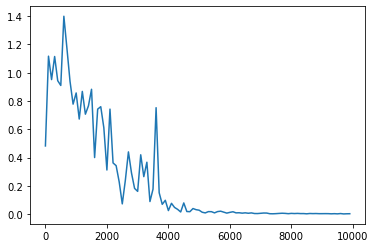

In [ ]:
import numpy as np
from common import functions
import matplotlib.pyplot as plt

# def d_tanh(x):



# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)
# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)],dtype=np.uint8).T,axis=1)

input_layer_size = 2
hidden_layer_size = 16
output_layer_size = 1

weight_init_std = 1
learning_rate = 0.1

iters_num = 10000
plot_interval = 100

# ウェイト初期化 (バイアスは簡単のため省略)
W_in = weight_init_std * np.random.randn(input_layer_size, hidden_layer_size)
W_out = weight_init_std * np.random.randn(hidden_layer_size, output_layer_size)
W = weight_init_std * np.random.randn(hidden_layer_size, hidden_layer_size)

# Xavier


# He



# 勾配
W_in_grad = np.zeros_like(W_in)
W_out_grad = np.zeros_like(W_out)
W_grad = np.zeros_like(W)

u = np.zeros((hidden_layer_size, binary_dim + 1))
z = np.zeros((hidden_layer_size, binary_dim + 1))
y = np.zeros((output_layer_size, binary_dim))

delta_out = np.zeros((output_layer_size, binary_dim))
delta = np.zeros((hidden_layer_size, binary_dim + 1))

all_losses = []

for i in range(iters_num):
    
    # A, B初期化 (a + b = d)
    a_int = np.random.randint(largest_number/2)
    a_bin = binary[a_int] # binary encoding
    b_int = np.random.randint(largest_number/2)
    b_bin = binary[b_int] # binary encoding
    
    # 正解データ
    d_int = a_int + b_int
    d_bin = binary[d_int]
    
    # 出力バイナリ
    out_bin = np.zeros_like(d_bin)
    
    # 時系列全体の誤差
    all_loss = 0    
    
    # 時系列ループ
    for t in range(binary_dim):
        # 入力値
        X = np.array([a_bin[ - t - 1], b_bin[ - t - 1]]).reshape(1, -1)
        # 時刻tにおける正解データ
        dd = np.array([d_bin[binary_dim - t - 1]])
        
        u[:,t+1] = np.dot(X, W_in) + np.dot(z[:,t].reshape(1, -1), W)
        z[:,t+1] = functions.sigmoid(u[:,t+1])

        y[:,t] = functions.sigmoid(np.dot(z[:,t+1].reshape(1, -1), W_out))


        #誤差
        loss = functions.mean_squared_error(dd, y[:,t])
        
        delta_out[:,t] = functions.d_mean_squared_error(dd, y[:,t]) * functions.d_sigmoid(y[:,t])        
        
        all_loss += loss

        out_bin[binary_dim - t - 1] = np.round(y[:,t])
    
    
    for t in range(binary_dim)[::-1]:
        X = np.array([a_bin[-t-1],b_bin[-t-1]]).reshape(1, -1)        

        delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * functions.d_sigmoid(u[:,t+1])

        # 勾配更新
        W_out_grad += np.dot(z[:,t+1].reshape(-1,1), delta_out[:,t].reshape(-1,1))
        W_grad += np.dot(z[:,t].reshape(-1,1), delta[:,t].reshape(1,-1))
        W_in_grad += np.dot(X.T, delta[:,t].reshape(1,-1))
    
    # 勾配適用
    W_in -= learning_rate * W_in_grad
    W_out -= learning_rate * W_out_grad
    W -= learning_rate * W_grad
    
    W_in_grad *= 0
    W_out_grad *= 0
    W_grad *= 0
    

    if(i % plot_interval == 0):
        all_losses.append(all_loss)        
        print("iters:" + str(i))
        print("Loss:" + str(all_loss))
        print("Pred:" + str(out_bin))
        print("True:" + str(d_bin))
        out_int = 0
        for index,x in enumerate(reversed(out_bin)):
            out_int += x * pow(2, index)
        print(str(a_int) + " + " + str(b_int) + " = " + str(out_int))
        print("------------")

lists = range(0, iters_num, plot_interval)
plt.plot(lists, all_losses, label="loss")
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
実装演習

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# 新しいセクション

## [try] weight_init_stdやlearning_rate, hidden_layer_sizeを変更してみよう

iters:0
Loss:1.255930147275783
Pred:[1 1 1 1 1 1 1 1]
True:[1 0 0 1 0 0 0 0]
108 + 36 = 255
------------
iters:100
Loss:1.0429738530410748
Pred:[0 1 1 0 1 0 1 1]
True:[0 1 1 0 0 1 1 0]
73 + 29 = 107
------------
iters:200
Loss:1.0403499553406765
Pred:[1 1 1 1 0 1 1 1]
True:[1 1 0 0 1 1 0 1]
118 + 87 = 247
------------
iters:300
Loss:1.0269269447330536
Pred:[0 1 1 1 1 0 1 1]
True:[1 0 1 0 1 0 1 0]
115 + 55 = 123
------------
iters:400
Loss:1.0458978598031323
Pred:[0 0 0 1 1 0 1 1]
True:[1 0 1 0 0 1 0 0]
58 + 106 = 27
------------
iters:500
Loss:1.0228280774776546
Pred:[0 0 1 0 0 0 1 1]
True:[0 1 0 1 0 1 1 1]
35 + 52 = 35
------------
iters:600
Loss:1.0531446684464172
Pred:[0 1 1 1 1 1 1 1]
True:[1 0 0 0 0 0 1 0]
126 + 4 = 127
------------
iters:700
Loss:1.0063405174098037
Pred:[0 0 0 1 1 1 1 1]
True:[0 0 1 1 0 0 0 1]
30 + 19 = 31
------------
iters:800
Loss:0.9890898794425789
Pred:[1 1 1 0 0 1 1 1]
True:[0 1 1 1 0 1 0 1]
4 + 113 = 231
------------
iters:900
Loss:1.0248332803328832
Pred:

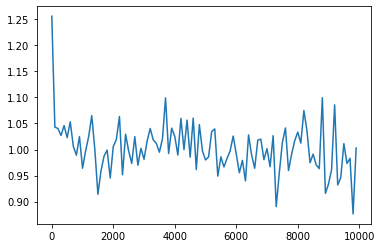

In [ ]:
import numpy as np
from common import functions
import matplotlib.pyplot as plt

# def d_tanh(x):



# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)
# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)],dtype=np.uint8).T,axis=1)

input_layer_size = 2
# ★hidden_layer_sizeを16から8に変更
hidden_layer_size = 16
output_layer_size = 1

# ★学習率を1から0.5に変更
weight_init_std = 0.5
# ★学習率を0.1から0.01に変更
learning_rate = 0.01

iters_num = 10000
plot_interval = 100

# ウェイト初期化 (バイアスは簡単のため省略)
W_in = weight_init_std * np.random.randn(input_layer_size, hidden_layer_size)
W_out = weight_init_std * np.random.randn(hidden_layer_size, output_layer_size)
W = weight_init_std * np.random.randn(hidden_layer_size, hidden_layer_size)

# Xavier


# He



# 勾配
W_in_grad = np.zeros_like(W_in)
W_out_grad = np.zeros_like(W_out)
W_grad = np.zeros_like(W)

u = np.zeros((hidden_layer_size, binary_dim + 1))
z = np.zeros((hidden_layer_size, binary_dim + 1))
y = np.zeros((output_layer_size, binary_dim))

delta_out = np.zeros((output_layer_size, binary_dim))
delta = np.zeros((hidden_layer_size, binary_dim + 1))

all_losses = []

for i in range(iters_num):
    
    # A, B初期化 (a + b = d)
    a_int = np.random.randint(largest_number/2)
    a_bin = binary[a_int] # binary encoding
    b_int = np.random.randint(largest_number/2)
    b_bin = binary[b_int] # binary encoding
    
    # 正解データ
    d_int = a_int + b_int
    d_bin = binary[d_int]
    
    # 出力バイナリ
    out_bin = np.zeros_like(d_bin)
    
    # 時系列全体の誤差
    all_loss = 0    
    
    # 時系列ループ
    for t in range(binary_dim):
        # 入力値
        X = np.array([a_bin[ - t - 1], b_bin[ - t - 1]]).reshape(1, -1)
        # 時刻tにおける正解データ
        dd = np.array([d_bin[binary_dim - t - 1]])
        
        u[:,t+1] = np.dot(X, W_in) + np.dot(z[:,t].reshape(1, -1), W)
        z[:,t+1] = functions.sigmoid(u[:,t+1])

        y[:,t] = functions.sigmoid(np.dot(z[:,t+1].reshape(1, -1), W_out))


        #誤差
        loss = functions.mean_squared_error(dd, y[:,t])
        
        delta_out[:,t] = functions.d_mean_squared_error(dd, y[:,t]) * functions.d_sigmoid(y[:,t])        
        
        all_loss += loss

        out_bin[binary_dim - t - 1] = np.round(y[:,t])
    
    
    for t in range(binary_dim)[::-1]:
        X = np.array([a_bin[-t-1],b_bin[-t-1]]).reshape(1, -1)        

        delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * functions.d_sigmoid(u[:,t+1])

        # 勾配更新
        W_out_grad += np.dot(z[:,t+1].reshape(-1,1), delta_out[:,t].reshape(-1,1))
        W_grad += np.dot(z[:,t].reshape(-1,1), delta[:,t].reshape(1,-1))
        W_in_grad += np.dot(X.T, delta[:,t].reshape(1,-1))
    
    # 勾配適用
    W_in -= learning_rate * W_in_grad
    W_out -= learning_rate * W_out_grad
    W -= learning_rate * W_grad
    
    W_in_grad *= 0
    W_out_grad *= 0
    W_grad *= 0
    

    if(i % plot_interval == 0):
        all_losses.append(all_loss)        
        print("iters:" + str(i))
        print("Loss:" + str(all_loss))
        print("Pred:" + str(out_bin))
        print("True:" + str(d_bin))
        out_int = 0
        for index,x in enumerate(reversed(out_bin)):
            out_int += x * pow(2, index)
        print(str(a_int) + " + " + str(b_int) + " = " + str(out_int))
        print("------------")

lists = range(0, iters_num, plot_interval)
plt.plot(lists, all_losses, label="loss")
plt.show()

## [try] 重みの初期化方法を変更してみよう(Xavier)

iters:0
Loss:0.9916816660512017
Pred:[1 1 1 1 1 1 1 1]
True:[0 1 1 0 0 1 1 1]
100 + 3 = 255
------------
iters:100
Loss:0.9848726036487218
Pred:[0 0 0 0 0 0 0 0]
True:[1 0 1 0 1 0 1 0]
46 + 124 = 0
------------
iters:200
Loss:1.18436370786785
Pred:[0 0 0 0 0 0 0 0]
True:[0 0 1 1 1 0 1 1]
42 + 17 = 0
------------
iters:300
Loss:1.1884243391276659
Pred:[1 1 1 1 1 1 1 1]
True:[1 0 0 0 1 0 0 1]
62 + 75 = 255
------------
iters:400
Loss:1.0071010559765334
Pred:[1 1 1 1 0 1 1 1]
True:[1 0 0 0 0 1 0 1]
26 + 107 = 247
------------
iters:500
Loss:0.9966953931789432
Pred:[1 0 1 1 1 1 1 1]
True:[0 1 1 1 0 1 0 1]
95 + 22 = 191
------------
iters:600
Loss:0.9741807403001818
Pred:[0 0 0 0 0 0 0 0]
True:[0 1 0 0 1 1 0 1]
59 + 18 = 0
------------
iters:700
Loss:1.0117160602394024
Pred:[0 0 0 0 0 0 1 0]
True:[0 1 0 0 1 0 1 1]
2 + 73 = 2
------------
iters:800
Loss:1.0746739939829544
Pred:[0 0 0 0 0 0 0 0]
True:[1 1 0 0 1 0 1 1]
77 + 126 = 0
------------
iters:900
Loss:1.04633667162721
Pred:[1 0 0 1 1 0

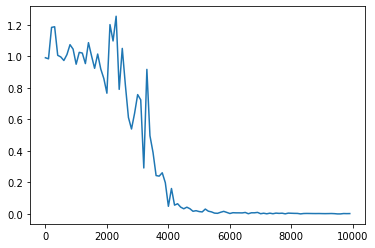

In [ ]:
import numpy as np
from common import functions
import matplotlib.pyplot as plt

# def d_tanh(x):



# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)
# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)],dtype=np.uint8).T,axis=1)

input_layer_size = 2
hidden_layer_size = 16
output_layer_size = 1

weight_init_std = 1
learning_rate = 0.1

iters_num = 10000
plot_interval = 100

# ウェイト初期化 (バイアスは簡単のため省略)
#W_in = weight_init_std * np.random.randn(input_layer_size, hidden_layer_size)
#W_out = weight_init_std * np.random.randn(hidden_layer_size, output_layer_size)
#W = weight_init_std * np.random.randn(hidden_layer_size, hidden_layer_size)

# Xavier
W_in = np.random.randn(input_layer_size, hidden_layer_size) / np.sqrt(input_layer_size)
W_out = np.random.randn(hidden_layer_size, output_layer_size) / np.sqrt(hidden_layer_size)
W = np.random.randn(hidden_layer_size, hidden_layer_size) / np.sqrt(hidden_layer_size)
# He



# 勾配
W_in_grad = np.zeros_like(W_in)
W_out_grad = np.zeros_like(W_out)
W_grad = np.zeros_like(W)

u = np.zeros((hidden_layer_size, binary_dim + 1))
z = np.zeros((hidden_layer_size, binary_dim + 1))
y = np.zeros((output_layer_size, binary_dim))

delta_out = np.zeros((output_layer_size, binary_dim))
delta = np.zeros((hidden_layer_size, binary_dim + 1))

all_losses = []

for i in range(iters_num):
    
    # A, B初期化 (a + b = d)
    a_int = np.random.randint(largest_number/2)
    a_bin = binary[a_int] # binary encoding
    b_int = np.random.randint(largest_number/2)
    b_bin = binary[b_int] # binary encoding
    
    # 正解データ
    d_int = a_int + b_int
    d_bin = binary[d_int]
    
    # 出力バイナリ
    out_bin = np.zeros_like(d_bin)
    
    # 時系列全体の誤差
    all_loss = 0    
    
    # 時系列ループ
    for t in range(binary_dim):
        # 入力値
        X = np.array([a_bin[ - t - 1], b_bin[ - t - 1]]).reshape(1, -1)
        # 時刻tにおける正解データ
        dd = np.array([d_bin[binary_dim - t - 1]])
        
        u[:,t+1] = np.dot(X, W_in) + np.dot(z[:,t].reshape(1, -1), W)
        z[:,t+1] = functions.sigmoid(u[:,t+1])

        y[:,t] = functions.sigmoid(np.dot(z[:,t+1].reshape(1, -1), W_out))


        #誤差
        loss = functions.mean_squared_error(dd, y[:,t])
        
        delta_out[:,t] = functions.d_mean_squared_error(dd, y[:,t]) * functions.d_sigmoid(y[:,t])        
        
        all_loss += loss

        out_bin[binary_dim - t - 1] = np.round(y[:,t])
    
    
    for t in range(binary_dim)[::-1]:
        X = np.array([a_bin[-t-1],b_bin[-t-1]]).reshape(1, -1)        

        delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * functions.d_sigmoid(u[:,t+1])

        # 勾配更新
        W_out_grad += np.dot(z[:,t+1].reshape(-1,1), delta_out[:,t].reshape(-1,1))
        W_grad += np.dot(z[:,t].reshape(-1,1), delta[:,t].reshape(1,-1))
        W_in_grad += np.dot(X.T, delta[:,t].reshape(1,-1))
    
    # 勾配適用
    W_in -= learning_rate * W_in_grad
    W_out -= learning_rate * W_out_grad
    W -= learning_rate * W_grad
    
    W_in_grad *= 0
    W_out_grad *= 0
    W_grad *= 0
    

    if(i % plot_interval == 0):
        all_losses.append(all_loss)        
        print("iters:" + str(i))
        print("Loss:" + str(all_loss))
        print("Pred:" + str(out_bin))
        print("True:" + str(d_bin))
        out_int = 0
        for index,x in enumerate(reversed(out_bin)):
            out_int += x * pow(2, index)
        print(str(a_int) + " + " + str(b_int) + " = " + str(out_int))
        print("------------")

lists = range(0, iters_num, plot_interval)
plt.plot(lists, all_losses, label="loss")
plt.show()

## 重みの初期化方法を変更してみよう（He）

iters:0
Loss:1.3205994300014954
Pred:[1 1 1 1 1 1 1 1]
True:[0 1 0 0 0 1 0 1]
2 + 67 = 255
------------
iters:100
Loss:1.0219440485165625
Pred:[0 0 0 0 0 0 0 0]
True:[1 0 1 1 1 1 0 0]
62 + 126 = 0
------------
iters:200
Loss:0.9865415957859377
Pred:[1 0 1 0 1 1 0 0]
True:[1 0 0 1 0 1 0 1]
82 + 67 = 172
------------
iters:300
Loss:0.9637908782987206
Pred:[1 1 1 1 1 1 1 1]
True:[0 1 0 1 1 1 0 0]
45 + 47 = 255
------------
iters:400
Loss:1.001506589369422
Pred:[0 0 0 1 0 0 0 0]
True:[1 0 0 1 0 1 1 0]
72 + 78 = 16
------------
iters:500
Loss:0.8934644177083986
Pred:[1 1 1 1 1 1 1 1]
True:[0 1 1 0 0 1 1 1]
51 + 52 = 255
------------
iters:600
Loss:0.9600676629688679
Pred:[0 1 1 1 1 1 1 1]
True:[0 1 0 0 0 1 1 1]
23 + 48 = 127
------------
iters:700
Loss:1.0398174081232794
Pred:[0 0 0 0 0 0 0 0]
True:[0 1 1 0 1 1 0 1]
108 + 1 = 0
------------
iters:800
Loss:0.9906125775352869
Pred:[1 1 1 1 1 1 1 1]
True:[0 0 1 1 1 0 1 0]
8 + 50 = 255
------------
iters:900
Loss:1.0010872326868772
Pred:[0 1 1 

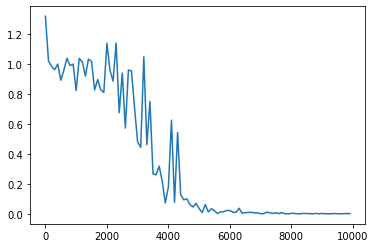

In [ ]:
import numpy as np
from common import functions
import matplotlib.pyplot as plt

# def d_tanh(x):



# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)
# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)],dtype=np.uint8).T,axis=1)

input_layer_size = 2
hidden_layer_size = 16
output_layer_size = 1

weight_init_std = 1
learning_rate = 0.1

iters_num = 10000
plot_interval = 100

# ウェイト初期化 (バイアスは簡単のため省略)
#W_in = weight_init_std * np.random.randn(input_layer_size, hidden_layer_size)
#W_out = weight_init_std * np.random.randn(hidden_layer_size, output_layer_size)
#W = weight_init_std * np.random.randn(hidden_layer_size, hidden_layer_size)

# Xavier
#W_in = np.random.randn(input_layer_size, hidden_layer_size) / np.sqrt(input_layer_size)
#W_out = np.random.randn(hidden_layer_size, output_layer_size) / np.sqrt(hidden_layer_size)
#W = np.random.randn(hidden_layer_size, hidden_layer_size) / np.sqrt(hidden_layer_size)
# He
W_in = np.random.randn(input_layer_size, hidden_layer_size) / np.sqrt(input_layer_size) * np.sqrt(2)
W_out = np.random.randn(hidden_layer_size, output_layer_size) / np.sqrt(hidden_layer_size) * np.sqrt(2)
W = np.random.randn(hidden_layer_size, hidden_layer_size) / np.sqrt(hidden_layer_size) * np.sqrt(2)

# 勾配
W_in_grad = np.zeros_like(W_in)
W_out_grad = np.zeros_like(W_out)
W_grad = np.zeros_like(W)

u = np.zeros((hidden_layer_size, binary_dim + 1))
z = np.zeros((hidden_layer_size, binary_dim + 1))
y = np.zeros((output_layer_size, binary_dim))

delta_out = np.zeros((output_layer_size, binary_dim))
delta = np.zeros((hidden_layer_size, binary_dim + 1))

all_losses = []

for i in range(iters_num):
    
    # A, B初期化 (a + b = d)
    a_int = np.random.randint(largest_number/2)
    a_bin = binary[a_int] # binary encoding
    b_int = np.random.randint(largest_number/2)
    b_bin = binary[b_int] # binary encoding
    
    # 正解データ
    d_int = a_int + b_int
    d_bin = binary[d_int]
    
    # 出力バイナリ
    out_bin = np.zeros_like(d_bin)
    
    # 時系列全体の誤差
    all_loss = 0    
    
    # 時系列ループ
    for t in range(binary_dim):
        # 入力値
        X = np.array([a_bin[ - t - 1], b_bin[ - t - 1]]).reshape(1, -1)
        # 時刻tにおける正解データ
        dd = np.array([d_bin[binary_dim - t - 1]])
        
        u[:,t+1] = np.dot(X, W_in) + np.dot(z[:,t].reshape(1, -1), W)
        z[:,t+1] = functions.sigmoid(u[:,t+1])

        y[:,t] = functions.sigmoid(np.dot(z[:,t+1].reshape(1, -1), W_out))


        #誤差
        loss = functions.mean_squared_error(dd, y[:,t])
        
        delta_out[:,t] = functions.d_mean_squared_error(dd, y[:,t]) * functions.d_sigmoid(y[:,t])        
        
        all_loss += loss

        out_bin[binary_dim - t - 1] = np.round(y[:,t])
    
    
    for t in range(binary_dim)[::-1]:
        X = np.array([a_bin[-t-1],b_bin[-t-1]]).reshape(1, -1)        

        delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * functions.d_sigmoid(u[:,t+1])

        # 勾配更新
        W_out_grad += np.dot(z[:,t+1].reshape(-1,1), delta_out[:,t].reshape(-1,1))
        W_grad += np.dot(z[:,t].reshape(-1,1), delta[:,t].reshape(1,-1))
        W_in_grad += np.dot(X.T, delta[:,t].reshape(1,-1))
    
    # 勾配適用
    W_in -= learning_rate * W_in_grad
    W_out -= learning_rate * W_out_grad
    W -= learning_rate * W_grad
    
    W_in_grad *= 0
    W_out_grad *= 0
    W_grad *= 0
    

    if(i % plot_interval == 0):
        all_losses.append(all_loss)        
        print("iters:" + str(i))
        print("Loss:" + str(all_loss))
        print("Pred:" + str(out_bin))
        print("True:" + str(d_bin))
        out_int = 0
        for index,x in enumerate(reversed(out_bin)):
            out_int += x * pow(2, index)
        print(str(a_int) + " + " + str(b_int) + " = " + str(out_int))
        print("------------")

lists = range(0, iters_num, plot_interval)
plt.plot(lists, all_losses, label="loss")
plt.show()

## [try] 中間層の活性化関数を変更1: ReLU(勾配爆発を確認しよう)

/content/drive/My Drive/DNN_code/common/functions.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


iters:0
Loss:1.0950167700232143
Pred:[0 0 0 0 0 0 0 1]
True:[1 0 0 0 0 1 0 1]
82 + 51 = 1
------------
iters:100
Loss:1.9801874981462806
Pred:[1 1 1 1 1 1 1 0]
True:[1 0 0 1 1 0 0 0]
73 + 79 = 254
------------
iters:200
Loss:2.50000010551332
Pred:[0 0 0 0 0 0 0 1]
True:[1 1 0 1 1 1 0 1]
117 + 104 = 1
------------
iters:300
Loss:0.5026751188402911
Pred:[0 0 0 0 0 0 0 1]
True:[1 0 0 0 0 0 0 1]
21 + 108 = 1
------------
iters:400
Loss:1.1250000000091345
Pred:[0 0 0 0 0 1 1 0]
True:[1 0 0 1 0 1 1 0]
122 + 28 = 6
------------
iters:500
Loss:1.4975234773061472
Pred:[0 0 0 0 0 0 0 1]
True:[1 0 0 1 0 1 0 1]
107 + 42 = 1
------------
iters:600
Loss:1.9997982278514077
Pred:[0 0 0 0 0 0 0 1]
True:[0 1 1 1 0 0 1 1]
69 + 46 = 1
------------
iters:700
Loss:2.5000000000000004
Pred:[1 1 1 1 1 1 1 1]
True:[1 0 0 0 0 0 1 1]
105 + 26 = 255
------------
iters:800
Loss:1.9999786465034717
Pred:[0 0 0 0 0 0 0 1]
True:[1 0 1 1 0 0 1 1]
92 + 87 = 1
------------
iters:900
Loss:1.6008234734868965
Pred:[0 0 0 0 0

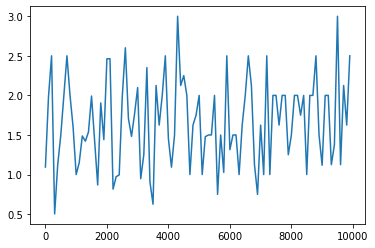

In [ ]:
import numpy as np
from common import functions
import matplotlib.pyplot as plt

# def d_tanh(x):



# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)
# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)],dtype=np.uint8).T,axis=1)

input_layer_size = 2
hidden_layer_size = 16
output_layer_size = 1

weight_init_std = 1
learning_rate = 0.1

iters_num = 10000
plot_interval = 100

# ウェイト初期化 (バイアスは簡単のため省略)
W_in = weight_init_std * np.random.randn(input_layer_size, hidden_layer_size)
W_out = weight_init_std * np.random.randn(hidden_layer_size, output_layer_size)
W = weight_init_std * np.random.randn(hidden_layer_size, hidden_layer_size)

# Xavier


# He



# 勾配
W_in_grad = np.zeros_like(W_in)
W_out_grad = np.zeros_like(W_out)
W_grad = np.zeros_like(W)

u = np.zeros((hidden_layer_size, binary_dim + 1))
z = np.zeros((hidden_layer_size, binary_dim + 1))
y = np.zeros((output_layer_size, binary_dim))

delta_out = np.zeros((output_layer_size, binary_dim))
delta = np.zeros((hidden_layer_size, binary_dim + 1))

all_losses = []

for i in range(iters_num):
    
    # A, B初期化 (a + b = d)
    a_int = np.random.randint(largest_number/2)
    a_bin = binary[a_int] # binary encoding
    b_int = np.random.randint(largest_number/2)
    b_bin = binary[b_int] # binary encoding
    
    # 正解データ
    d_int = a_int + b_int
    d_bin = binary[d_int]
    
    # 出力バイナリ
    out_bin = np.zeros_like(d_bin)
    
    # 時系列全体の誤差
    all_loss = 0    
    
    # 時系列ループ
    for t in range(binary_dim):
        # 入力値
        X = np.array([a_bin[ - t - 1], b_bin[ - t - 1]]).reshape(1, -1)
        # 時刻tにおける正解データ
        dd = np.array([d_bin[binary_dim - t - 1]])
        
        u[:,t+1] = np.dot(X, W_in) + np.dot(z[:,t].reshape(1, -1), W)
        z[:,t+1] = functions.relu(u[:,t+1])

        y[:,t] = functions.sigmoid(np.dot(z[:,t+1].reshape(1, -1), W_out))


        #誤差
        loss = functions.mean_squared_error(dd, y[:,t])
        
        delta_out[:,t] = functions.d_mean_squared_error(dd, y[:,t]) * functions.d_sigmoid(y[:,t])        
        
        all_loss += loss

        out_bin[binary_dim - t - 1] = np.round(y[:,t])
    
    
    for t in range(binary_dim)[::-1]:
        X = np.array([a_bin[-t-1],b_bin[-t-1]]).reshape(1, -1)        

        delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * functions.d_sigmoid(u[:,t+1])

        # 勾配更新
        W_out_grad += np.dot(z[:,t+1].reshape(-1,1), delta_out[:,t].reshape(-1,1))
        W_grad += np.dot(z[:,t].reshape(-1,1), delta[:,t].reshape(1,-1))
        W_in_grad += np.dot(X.T, delta[:,t].reshape(1,-1))
    
    # 勾配適用
    W_in -= learning_rate * W_in_grad
    W_out -= learning_rate * W_out_grad
    W -= learning_rate * W_grad
    
    W_in_grad *= 0
    W_out_grad *= 0
    W_grad *= 0
    

    if(i % plot_interval == 0):
        all_losses.append(all_loss)        
        print("iters:" + str(i))
        print("Loss:" + str(all_loss))
        print("Pred:" + str(out_bin))
        print("True:" + str(d_bin))
        out_int = 0
        for index,x in enumerate(reversed(out_bin)):
            out_int += x * pow(2, index)
        print(str(a_int) + " + " + str(b_int) + " = " + str(out_int))
        print("------------")

lists = range(0, iters_num, plot_interval)
plt.plot(lists, all_losses, label="loss")
plt.show()

## [try] 中間層の活性化関数を変更2: tanh(numpyにtanhが用意されている。導関数をd_tanhとして作成しよう)

iters:0
Loss:1.755991494625447
Pred:[0 0 0 0 1 1 0 0]
True:[1 0 1 1 0 1 1 0]
119 + 63 = 12
------------
iters:100
Loss:1.255471144705594
Pred:[0 0 0 1 0 1 0 1]
True:[1 0 0 0 1 1 1 0]
35 + 107 = 21
------------
iters:200
Loss:1.1500650835116433
Pred:[1 0 0 1 1 1 1 0]
True:[1 0 0 0 0 1 1 0]
12 + 122 = 158
------------
iters:300
Loss:1.1944687625360408
Pred:[1 1 1 0 1 0 0 1]
True:[1 0 0 0 1 1 0 1]
20 + 121 = 233
------------
iters:400
Loss:0.9944564954834548
Pred:[1 0 1 0 1 1 1 0]
True:[1 1 0 0 1 0 1 0]
113 + 89 = 174
------------
iters:500
Loss:0.990262272999294
Pred:[1 0 1 1 1 1 1 0]
True:[1 0 0 0 1 1 0 1]
69 + 72 = 190
------------
iters:600
Loss:1.0278385510117496
Pred:[1 0 1 0 1 0 0 0]
True:[1 0 0 1 1 1 1 0]
45 + 113 = 168
------------
iters:700
Loss:1.1172364598480926
Pred:[1 1 1 0 1 0 1 0]
True:[1 0 1 0 0 1 0 1]
39 + 126 = 234
------------
iters:800
Loss:1.1379634423579263
Pred:[1 1 0 1 0 0 0 1]
True:[1 0 1 1 0 1 1 1]
76 + 107 = 209
------------
iters:900
Loss:1.1202991342028172
Pr

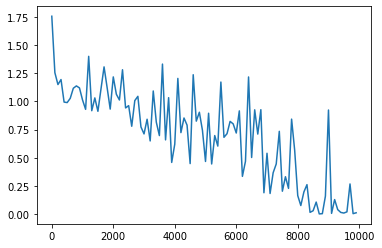

In [ ]:
import numpy as np
from common import functions
import matplotlib.pyplot as plt

def d_tanh(x):
  return np.tanh(x)

# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)
# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)],dtype=np.uint8).T,axis=1)

input_layer_size = 2
hidden_layer_size = 16
output_layer_size = 1

weight_init_std = 1
learning_rate = 0.1

iters_num = 10000
plot_interval = 100

# ウェイト初期化 (バイアスは簡単のため省略)
W_in = weight_init_std * np.random.randn(input_layer_size, hidden_layer_size)
W_out = weight_init_std * np.random.randn(hidden_layer_size, output_layer_size)
W = weight_init_std * np.random.randn(hidden_layer_size, hidden_layer_size)

# Xavier


# He



# 勾配
W_in_grad = np.zeros_like(W_in)
W_out_grad = np.zeros_like(W_out)
W_grad = np.zeros_like(W)

u = np.zeros((hidden_layer_size, binary_dim + 1))
z = np.zeros((hidden_layer_size, binary_dim + 1))
y = np.zeros((output_layer_size, binary_dim))

delta_out = np.zeros((output_layer_size, binary_dim))
delta = np.zeros((hidden_layer_size, binary_dim + 1))

all_losses = []

for i in range(iters_num):
    
    # A, B初期化 (a + b = d)
    a_int = np.random.randint(largest_number/2)
    a_bin = binary[a_int] # binary encoding
    b_int = np.random.randint(largest_number/2)
    b_bin = binary[b_int] # binary encoding
    
    # 正解データ
    d_int = a_int + b_int
    d_bin = binary[d_int]
    
    # 出力バイナリ
    out_bin = np.zeros_like(d_bin)
    
    # 時系列全体の誤差
    all_loss = 0    
    
    # 時系列ループ
    for t in range(binary_dim):
        # 入力値
        X = np.array([a_bin[ - t - 1], b_bin[ - t - 1]]).reshape(1, -1)
        # 時刻tにおける正解データ
        dd = np.array([d_bin[binary_dim - t - 1]])
        
        u[:,t+1] = np.dot(X, W_in) + np.dot(z[:,t].reshape(1, -1), W)
        z[:,t+1] = d_tanh(u[:,t+1])

        y[:,t] = functions.sigmoid(np.dot(z[:,t+1].reshape(1, -1), W_out))


        #誤差
        loss = functions.mean_squared_error(dd, y[:,t])
        
        delta_out[:,t] = functions.d_mean_squared_error(dd, y[:,t]) * functions.d_sigmoid(y[:,t])        
        
        all_loss += loss

        out_bin[binary_dim - t - 1] = np.round(y[:,t])
    
    
    for t in range(binary_dim)[::-1]:
        X = np.array([a_bin[-t-1],b_bin[-t-1]]).reshape(1, -1)        

        delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * functions.d_sigmoid(u[:,t+1])

        # 勾配更新
        W_out_grad += np.dot(z[:,t+1].reshape(-1,1), delta_out[:,t].reshape(-1,1))
        W_grad += np.dot(z[:,t].reshape(-1,1), delta[:,t].reshape(1,-1))
        W_in_grad += np.dot(X.T, delta[:,t].reshape(1,-1))
    
    # 勾配適用
    W_in -= learning_rate * W_in_grad
    W_out -= learning_rate * W_out_grad
    W -= learning_rate * W_grad
    
    W_in_grad *= 0
    W_out_grad *= 0
    W_grad *= 0
    

    if(i % plot_interval == 0):
        all_losses.append(all_loss)        
        print("iters:" + str(i))
        print("Loss:" + str(all_loss))
        print("Pred:" + str(out_bin))
        print("True:" + str(d_bin))
        out_int = 0
        for index,x in enumerate(reversed(out_bin)):
            out_int += x * pow(2, index)
        print(str(a_int) + " + " + str(b_int) + " = " + str(out_int))
        print("------------")

lists = range(0, iters_num, plot_interval)
plt.plot(lists, all_losses, label="loss")
plt.show()